In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv(r"C:\Data Science Assignments\Basics Statistis 1\simple linear regression\Salary_Data.csv")

### EDA

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.shape

(30, 2)

In [5]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [6]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
data.describe().sum()

YearsExperience        65.351221
Salary             486071.929785
dtype: float64

In [8]:
data.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   YearsExperience  30 non-null     bool 
 1   Salary           30 non-null     bool 
dtypes: bool(2)
memory usage: 188.0 bytes


### Data Preprocessing (Transformations) and Visualization

In [9]:
data['Log_Salary'] = np.log(data['Salary'])
data['Sqrt_YearsExperience'] = np.sqrt(data['YearsExperience'])
data['Squared_YearsExperience'] = data['YearsExperience'] ** 2


In [10]:
plt.figure(figsize=(12, 5))

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

Text(0, 0.5, 'Salary')

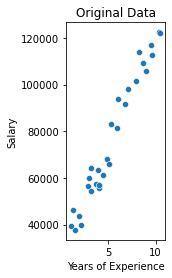

In [11]:
plt.subplot(131)
sns.scatterplot(data=data, x='YearsExperience', y='Salary')
plt.title('Original Data')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

Text(0, 0.5, 'Log(Salary)')

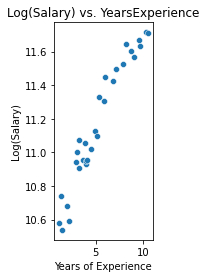

In [12]:
plt.subplot(132)
sns.scatterplot(data=data, x='YearsExperience', y='Log_Salary')
plt.title('Log(Salary) vs. YearsExperience')
plt.xlabel('Years of Experience')
plt.ylabel('Log(Salary)')

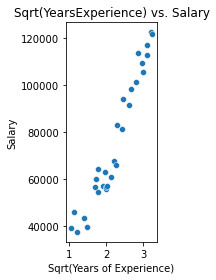

In [13]:
plt.subplot(133)
sns.scatterplot(data=data, x='Sqrt_YearsExperience', y='Salary')
plt.title('Sqrt(YearsExperience) vs. Salary')
plt.xlabel('Sqrt(Years of Experience)')
plt.ylabel('Salary')

plt.tight_layout()
plt.show()

In [14]:
#### Train-Test Split

X = data[['YearsExperience']]  # Independent variable
y = data['Salary']   

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (24, 1)
Shape of X_test: (6, 1)
Shape of y_train: (24,)
Shape of y_test: (6,)


In [17]:
## linear regression model

model = LinearRegression()

In [18]:
model.fit(X_train, y_train)

LinearRegression()

In [19]:
coefficients = model.coef_
intercept = model.intercept_

In [20]:
print("Linear Regression Equation: Salary =", coefficients[0], "* YearsExperience +", intercept)


Linear Regression Equation: Salary = 9423.815323030976 * YearsExperience + 25321.583011776813


In [21]:
## model evaluation

y_pred = model.predict(X_test)

In [22]:
mse = mean_squared_error(y_test, y_pred)

In [23]:
r2 = r2_score(y_test, y_pred)


In [24]:
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 49830096.85590839
R-squared (R2) Score: 0.9024461774180497


C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


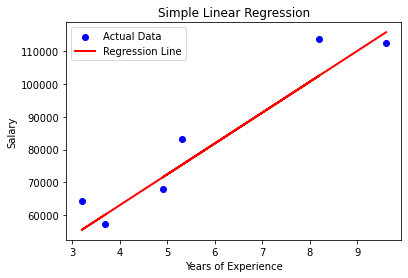

In [25]:
## Visualization

import matplotlib.pyplot as plt

#
X_test_array = X_test.to_numpy()
y_pred_array = model.predict(X_test_array)
plt.scatter(X_test_array, y_test, color='blue', label='Actual Data')


plt.plot(X_test_array, y_pred_array, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.title('Simple Linear Regression')

plt.show()
